In [8]:
import pandas as pd
import numpy as np
import tensorflow
import keras
from tensorflow.keras.layers import BatchNormalization,Flatten,Dropout,Dense,Conv2D,MaxPooling2D
from sklearn.metrics import confusion_matrix
from keras.models import Sequential
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
# Loading the MNIST dataset
from keras.datasets import mnist
(X_train,y_train),(X_test,y_test)=keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [11]:
print(X_train.shape)
print(X_train[0])

(60000, 28, 28)
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 25

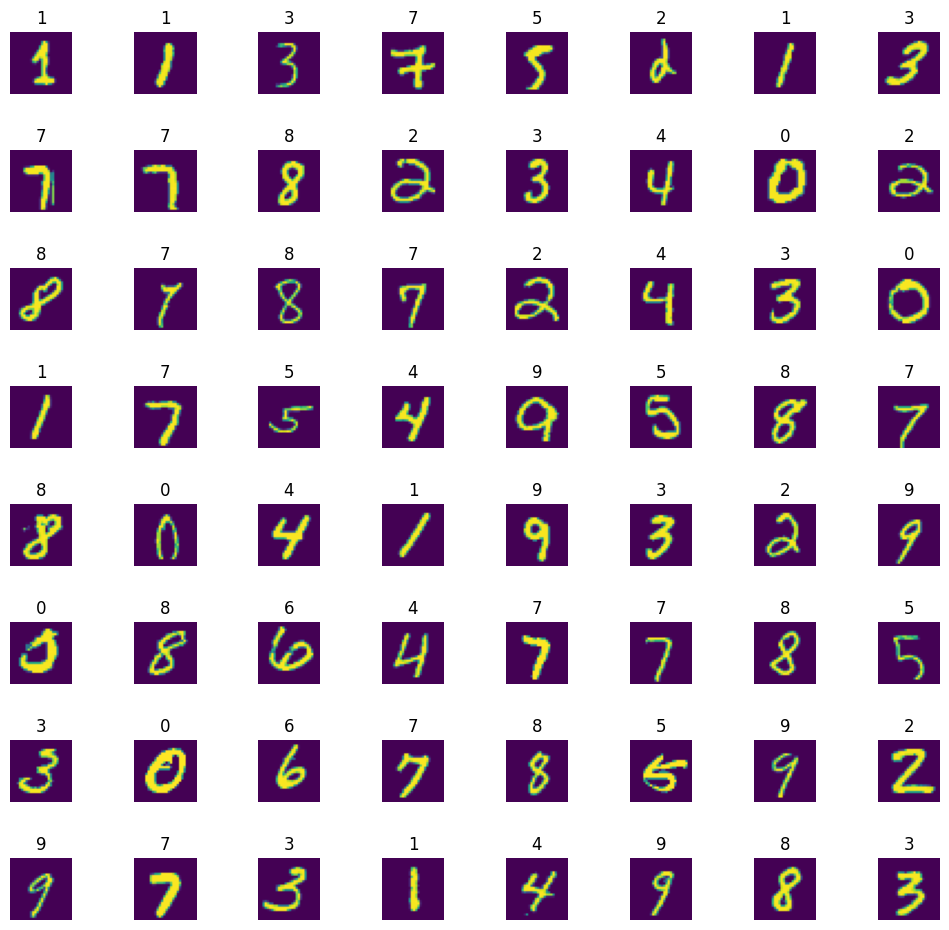

In [12]:
# Display some images
from sklearn.utils import shuffle
def showImages(num_row,num_col,X,Y):
    import matplotlib.pyplot as plt


    (X_rand, Y_rand) = shuffle(X, Y)

    fig, axes = plt.subplots(num_row,num_col,figsize = (12,12))
    axes = axes.ravel()
    for i in range(0, num_row*num_col):
        axes[i].imshow(X_rand[i])
        axes[i].set_title("{}".format(Y_rand.item(i)))
        axes[i].axis('off')
        plt.subplots_adjust(wspace =1)

    return
num_row = 8
num_col = 8
showImages(num_row,num_col,X =X_train,Y = y_train)

In [13]:
# Preprocessing the dataset
X_train = X_train / 255
X_test = X_test / 255
X_train = X_train.reshape(-1,28,28,1)
X_test = X_test.reshape(-1,28,28,1)

In [14]:
model=Sequential()
# model.add(Flatten(input_shape=(28,28)))
model.add(Conv2D(32, kernel_size = 3, activation='relu', input_shape = (28, 28, 1),kernel_initializer='he_normal'))
model.add(BatchNormalization())
model.add(Conv2D(32, kernel_size = 3, activation='relu',kernel_initializer='he_normal'))
model.add(BatchNormalization())
model.add(Conv2D(32, kernel_size = 5, strides=2, padding='same', activation='relu',kernel_initializer='he_normal'))
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(Conv2D(64, kernel_size = 3, activation='relu',kernel_initializer='he_normal'))
model.add(BatchNormalization())
model.add(Conv2D(64, kernel_size = 3, activation='relu',kernel_initializer='he_normal'))
model.add(BatchNormalization())
model.add(Conv2D(64, kernel_size = 5, strides=2, padding='same', activation='relu',kernel_initializer='he_normal'))
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(Conv2D(128, kernel_size = 4, activation='relu',kernel_initializer='he_normal'))
model.add(BatchNormalization())
model.add(Flatten())
model.add(Dropout(0.3))
model.add(Dense(10, activation='softmax'))
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.fit(X_train,y_train,validation_split=0.2,epochs=5,batch_size=64)

Epoch 1/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 20s 10ms/step - accuracy: 0.8439 - loss: 0.4983 - val_accuracy: 0.9842 - val_loss: 0.0562
Epoch 2/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.9793 - loss: 0.0629 - val_accuracy: 0.9864 - val_loss: 0.0452
Epoch 3/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.9851 - loss: 0.0489 - val_accuracy: 0.9903 - val_loss: 0.0364
Epoch 4/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.9885 - loss: 0.0381 - val_accuracy: 0.9897 - val_loss: 0.0354
Epoch 5/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.9904 - loss: 0.0300 - val_accuracy: 0.9902 - val_loss: 0.0352


In [15]:
# Evaluating the model
test_loss, test_acc = model.evaluate(X_test,y_test)
print('Test accuracy:', test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9875 - loss: 0.0356
Test accuracy: 0.9911999702453613


4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 384ms/step


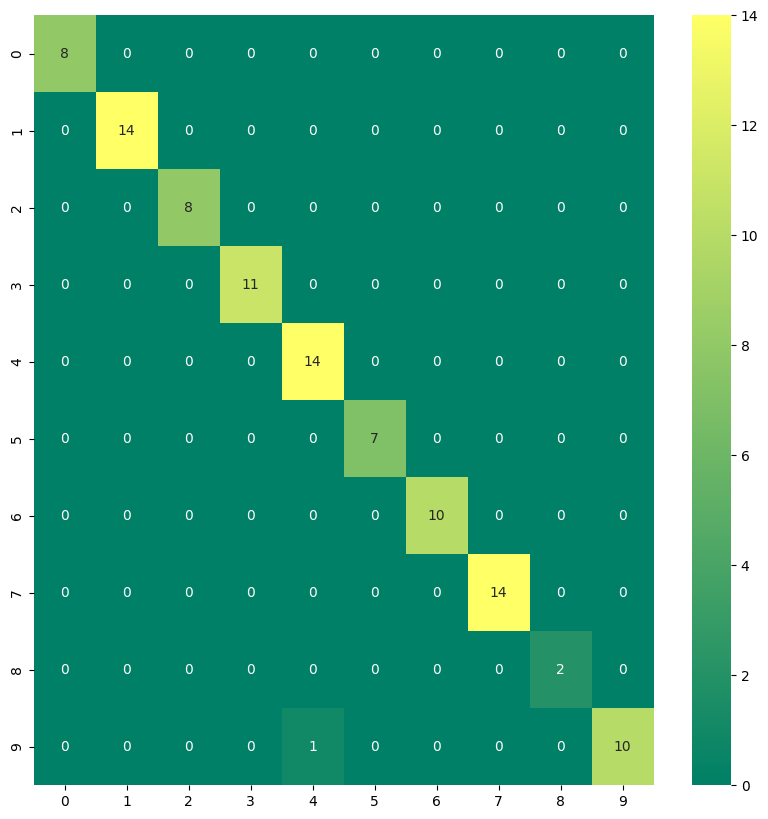

In [16]:
predictions=model.predict(X_test[1:100])
predictions=np.argmax(predictions,axis=1)
plt.figure(figsize=(10,10))
cm=confusion_matrix(y_test[1:100],predictions)
ax= plt.subplot()
sns.heatmap(cm, annot=True,cmap='summer', fmt='g', ax=ax);

In [17]:
print(X_test[1:5].shape)

(4, 28, 28, 1)


In [18]:
print(predictions.shape)
print(y_test.shape)

(99,)
(10000,)
